In [6]:
from IPython.display import Image, display

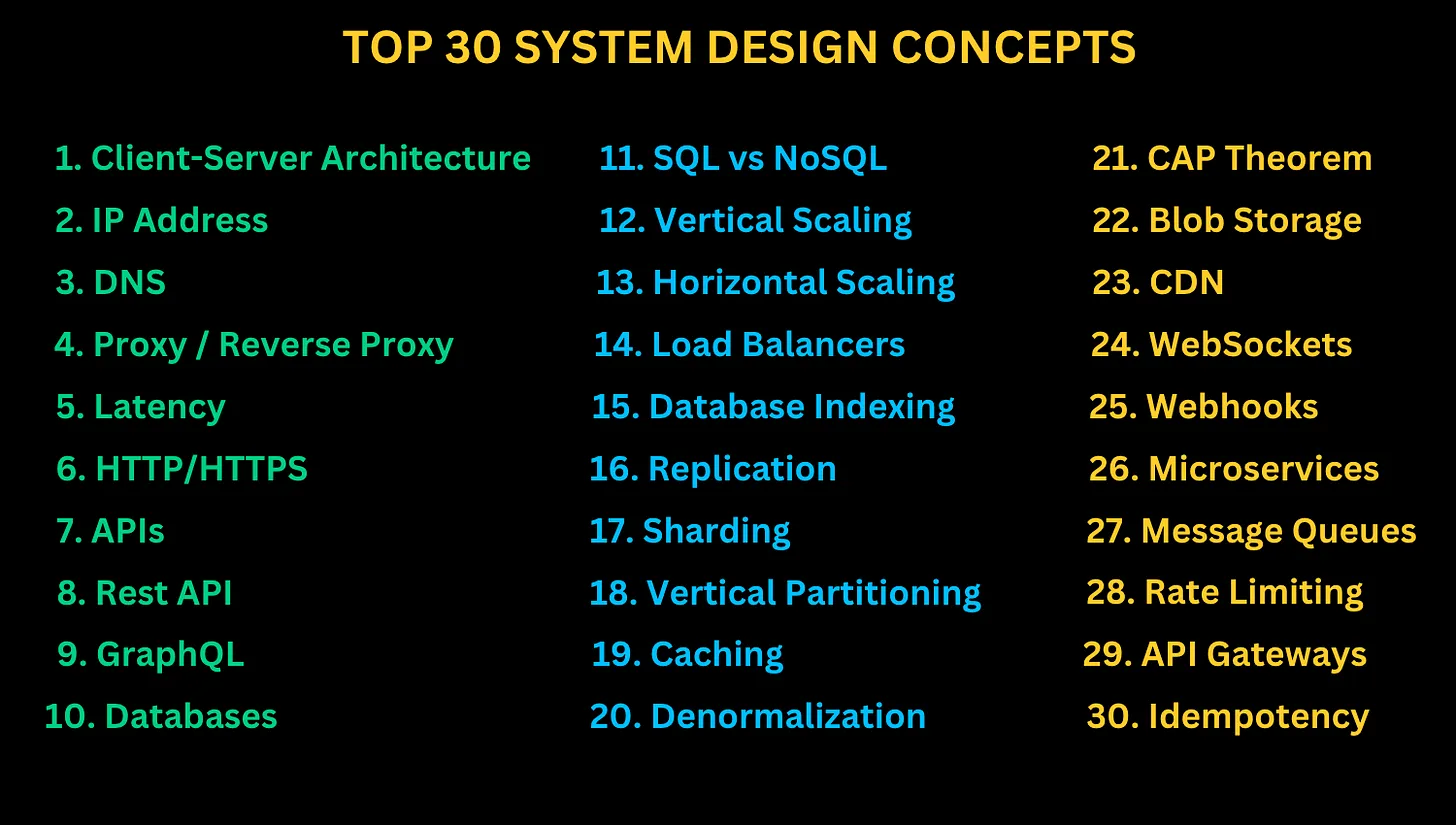

In [7]:
display(Image(filename='Utils/1.webp'))

## 1. Client-Server Architecture